# **Project name = STORE SALES PREDICTION**

# **Why are we doing it ?**

# **The success of any retail store depends upon its sales. more the sales made,more is the revenue.**

# **How it will help ?**

# **It will help to more in-flow of customers, and also helps in opening more store branches across a city/ country.**

# **It will help in strategizig thier buisness models and come up with innovative techniques and idea to atrract the customers and set realistic goals.**

# **Buisness Objective :**

# **BUILD A MODEL TO PREDICT THE SALES OF A STORE**

In [1]:
from google.colab import drive                     # to connect the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np                            # to  for scientific computing 
import pandas as pd                           # for data frame 
import matplotlib.pyplot as plt               # for visualization
import seaborn as sns                         # for visualization

from sklearn.linear_model import LinearRegression       # to performing machine learning with linear models. 
from sklearn.model_selection import train_test_split    # for training data and for testing data.
from sklearn.metrics import mean_squared_error          # for calculating the mean squared error
from sklearn.metrics import mean_absolute_error         # for calculating the mean absolute error 

from sklearn import preprocessing                       # to change raw data to clean data 
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # to get all values in same range      

from sklearn.datasets import make_regression              # to generate our dataset for the regression problem

import warnings
warnings.simplefilter(action='ignore')

# **Import data from data source**

In [3]:
StoreSales_data = pd.read_csv('/content/drive/MyDrive/MINI PROJECT/DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
StoreSales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [60]:
StoreSales_data["Item_Outlet_Sales"].head(10)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
5     556.6088
6     343.5528
7    4022.7636
8    1076.5986
9    4710.5350
Name: Item_Outlet_Sales, dtype: float64

In [4]:
print(StoreSales_data.dtypes)    ## Datatypes of all columns

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [5]:
StoreSales_data.describe()       # Summary of dataset

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
print(StoreSales_data.isnull().sum())        # Checking for null value in each column

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64


In [7]:
StoreSales_data = StoreSales_data.replace(to_replace = "@_!#$%^&*()<>?/\|}{~:?", value = np.nan)        ## check special character in dataset 

In [8]:
print(StoreSales_data.isnull().sum()) 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64


# There is no special character in dataset

In [9]:
StoreSales_data['Item_Outlet_Sales'].fillna(int(StoreSales_data['Item_Outlet_Sales'].mean()), inplace=True)   # filling nan values by mean 

In [10]:
print(StoreSales_data.isnull().sum())   ## after filling the values by mean checking the null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


# **convert non-numerical labeled columns into categorical type & then Numeric type**

In [11]:
StoreSales_df = StoreSales_data.copy()

In [12]:
print(StoreSales_df.dtypes)             # checking the data type

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [13]:
list = ["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]                         
for i in list :
  StoreSales_df[i] = StoreSales_df[i].astype("category")           ## to convert the non numerical (object) column to categorical column
  print(StoreSales_df)
print(StoreSales_df.dtypes)

      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.074402   
4               NCD19         8.93          Low Fat         0.064299   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.064709   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1              

In [62]:
label_encoder = preprocessing.LabelEncoder()                 # to convert categorcal column to numeric

l = ["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
for i in l:
  StoreSales_df[i] = label_encoder.fit_transform(StoreSales_df[i])
StoreSales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,2181.0000
14200,308,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,2181.0000
14201,1426,10.00,0,0.073529,8,118.7440,7,2002,2,1,1,2181.0000
14202,521,15.30,1,0.064709,3,214.6218,2,2007,2,1,1,2181.0000


In [15]:
print(StoreSales_df.dtypes)             # checking the data type

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object


# **Data scaling to normalize the features**

In [16]:
def feature_scale(scale):                                                       # Defining method to perform data scaling operation based on the type of scaling
  numerics = ['int64', 'int32', 'int64', 'float16', 'float32', 'float64']
  StoreSales_df1 = StoreSales_df.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  StoreSales_scaled = pd.DataFrame(scaler.fit_transform(StoreSales_df1.to_numpy()),columns=StoreSales_df1.columns)
  return StoreSales_scaled

In [17]:
scale = 'minmax'        #standard                     # scaling the data using MinMax Scaling process
StoreSales_scaled_df = feature_scale(scale)
StoreSales_scaled_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.149551,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333,0.164529
14200,0.197689,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667,0.164529
14201,0.915276,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333,0.164529
14202,0.334403,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333,0.164529


# **Correlation of features with targeted column**

In [18]:
# Finding correlation among numerical features, based on their strong relation we can choose the important features

corr = StoreSales_scaled_df.corr()
corr.style.background_gradient(cmap='Purples')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050768,-0.111079,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.002220
Item_Weight,0.050768,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.010262
Item_Fat_Content,-0.111079,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.014494
Item_Visibility,-0.040769,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.105063
Item_Type,-0.012048,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.013194
Item_MRP,0.010743,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.440979
Outlet_Identifier,-0.001089,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.125742
Outlet_Establishment_Year,-0.002954,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.038061
Outlet_Size,0.002209,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.046879
Outlet_Location_Type,-0.002473,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.069224


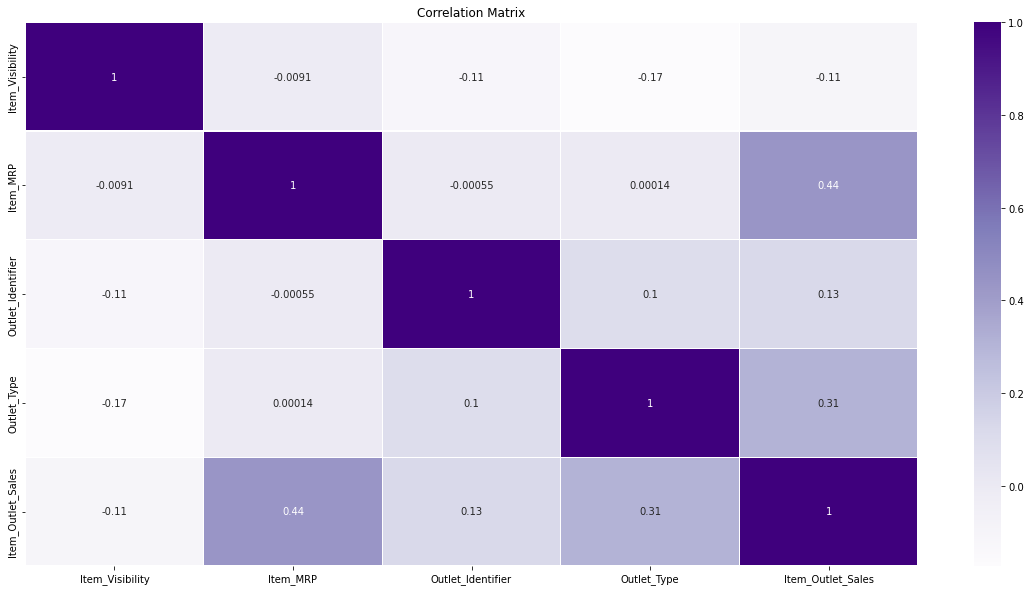

In [19]:
#SELECTING BEST FEATURE BASED ON THERE CORRELATION VALUE GREATER THAN 0.2

sel_corr = []
for i in StoreSales_scaled_df:
  if abs(StoreSales_scaled_df[i].corr(StoreSales_scaled_df['Item_Outlet_Sales']))>=0.1:
    sel_corr.append(i) 

#PLOTTING HEATMAP AMONG SELECTED FEATURES

fig, ax = plt.subplots(figsize = (20,10))
ax = (sns.heatmap(StoreSales_scaled_df[sel_corr]
                  .corr(), annot =True, cmap ='Purples',linewidths=0.1, linecolor='white').set(title = 'Correlation Matrix'))
plt.show()

In [61]:
StoreSales_corr = StoreSales_scaled_df[sel_corr]          ### checking the data type of highly corr features
StoreSales_corr

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales
0,0.038399,0.927507,1.000000,0.333333,0.283587
1,0.048346,0.072068,0.333333,0.666667,0.031419
2,0.040593,0.468288,1.000000,0.333333,0.158115
3,0.218055,0.640093,0.000000,0.000000,0.053555
4,0.186950,0.095805,0.111111,0.333333,0.073651
...,...,...,...,...,...
14199,0.030546,0.467004,0.888889,0.333333,0.164529
14200,0.429216,0.585126,0.333333,0.666667,0.164529
14201,0.215364,0.371199,0.777778,0.333333,0.164529
14202,0.188211,0.778154,0.222222,0.333333,0.164529


In [64]:
StoreSales_corr.drop(StoreSales_corr.columns[[4]], axis=1, inplace=True)
SS = StoreSales_df.iloc[:,[11]]
StoreSales_corr_df = pd.concat([SS, StoreSales_corr], axis=1)
StoreSales_corr_df

,Item_Outlet_Sales,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Type
0,3735.1380,0.038399,0.927507,1.000000,0.333333
1,443.4228,0.048346,0.072068,0.333333,0.666667
2,2097.2700,0.040593,0.468288,1.000000,0.333333
3,732.3800,0.218055,0.640093,0.000000,0.000000
4,994.7052,0.186950,0.095805,0.111111,0.333333
...,...,...,...,...,...
14199,2181.0000,0.030546,0.467004,0.888889,0.333333
14200,2181.0000,0.429216,0.585126,0.333333,0.666667
14201,2181.0000,0.215364,0.371199,0.777778,0.333333
14202,2181.0000,0.188211,0.778154,0.222222,0.333333


# **Data visualization to present the data**

In [21]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(StoreSales_data, x="Item_Type")
fig.show()

# **We can see in item type - fruits & vegetables are high in sales followed by snack foods**

In [22]:
import plotly.express as px
df = px.data.tips()
fig = px.box(StoreSales_data, x="Outlet_Type", y="Item_Outlet_Sales", notched=True)
fig.show()

# **Checking for outliers based on outlet type**

# **there are more outliers as well as sales in outlet type Supermarket Type - 3**

In [23]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(StoreSales_data, x="Outlet_Location_Type")
fig.show()

# **Out let location type of  Tier 3 are more present in data**

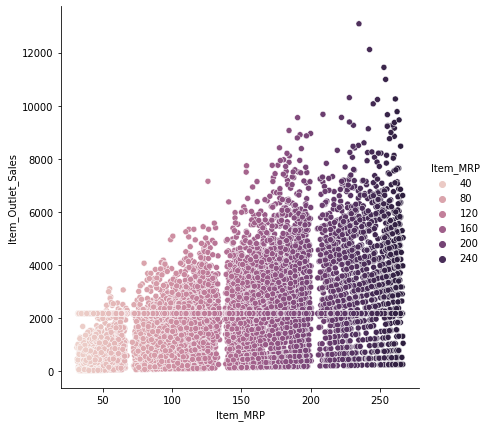

In [24]:
sns.pairplot(StoreSales_data,x_vars='Item_MRP', y_vars='Item_Outlet_Sales',height=6, hue ='Item_MRP')

# **Checkig for spread of item MRP with respect to Item outlet sales**

# **we can see more spread of whoes item MRP is 240 & less spread in item MRP 50**

In [25]:
import plotly.express as px

df = px.data.tips()
fig = px.pie(StoreSales_data, values='Item_Outlet_Sales', names='Outlet_Size')
fig.show()

# **Cheking for the outlet sales with respect to outlet size**

# **we can see the outlet size is medium has high sales followed by the outlet size is small**

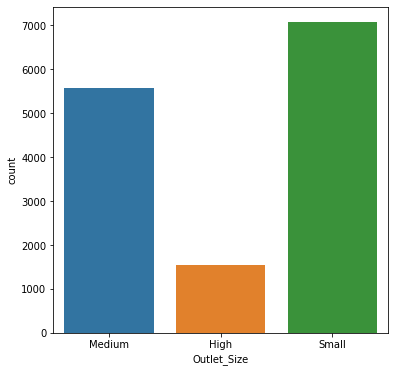

In [26]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=StoreSales_data)
plt.show()

# **The count of samll outlet size are high in data followed by medium and high**

# **Split data into train & test**

In [111]:
X_1 = np.array(StoreSales_corr_df.iloc[:,1:])                  ## splitting dataframe using train_test_split() built in method
y_1 = np.array(StoreSales_corr_df.iloc[:,[0]])                  
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1,y_1,test_size=0.3,random_state=1500)

print("Shape of new dataframes - \n X_train = {} ,\n X_test = {},\n y_train = {}, \n y_test = {}".format(X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape))

Shape of new dataframes - 
 X_train = (9942, 4) ,
 X_test = (4262, 4),
 y_train = (9942, 1), 
 y_test = (4262, 1)


# **APPLYING LINEAR REGRESSION TO CORR DATA**

In [112]:
s_model = LinearRegression().fit(X_train_1, y_train_1)               # fitting the linear regression to the model
s_r_sq=s_model.score(X_train_1, y_train_1)

In [113]:
print('coefficient of determination:', s_r_sq)
print('intercept:', s_model.intercept_)
print('slope:', s_model.coef_)

coefficient of determination: 0.3033697033462007
intercept: [439.75961152]
slope: [[-410.48956342 2212.62790919  396.90712197 1481.92820264]]


In [114]:
y_pred = s_model.predict(X_test_1)                                  # prediction response of model
print('predicted response:', y_pred, sep='\n')

predicted response:
[[1025.73584603]
 [1679.54014511]
 [1326.46818856]
 ...
 [1494.99045505]
 [2243.12707951]
 [2412.07232294]]


In [115]:
MSE=mean_squared_error(y_test_1, y_pred)
MAE=mean_absolute_error(y_test_1,y_pred)
RMSE = mean_squared_error(y_test_1, y_pred, squared=False)

print('MEAN SQUARED ERROR :', MSE)
print('MEAN ABSOLUTE ERROR :', MAE)
print('ROOT MEAN SQUARED ERROR :', RMSE)

MEAN SQUARED ERROR : 1194201.3267608567
MEAN ABSOLUTE ERROR : 822.3922743196213
ROOT MEAN SQUARED ERROR : 1092.795189759205


# **APPLYING LINEAR REGRESSION TO ALL DATA**

In [119]:
StoreSales_scaled_df.drop(StoreSales_scaled_df.columns[[11]], axis=1, inplace=True)
SS = StoreSales_df.iloc[:,[11]]   
StoreSales_scaled_df = pd.concat([SS, StoreSales_scaled_df], axis=1)
StoreSales_scaled_df

,Item_Outlet_Sales,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,3735.1380,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,443.4228,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,2097.2700,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,732.3800,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,994.7052,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,2181.0000,0.149551,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333
14200,2181.0000,0.197689,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667
14201,2181.0000,0.915276,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333
14202,2181.0000,0.334403,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333


# **Split data into train & test**

In [155]:
X1 = np.array(StoreSales_scaled_df.iloc[:,1:])                  ## splitting dataframe using train_test_split() built in method
y1 = np.array(StoreSales_scaled_df.iloc[:,[0]])                  
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size = 0.3, random_state = 1500)

print("Shape of new dataframes - \n X_train1 = {} ,\n X_test1 = {},\n y_train1 = {}, \n y_test1 = {}".format(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape))

Shape of new dataframes - 
 X_train1 = (9942, 11) ,
 X_test1 = (4262, 11),
 y_train1 = (9942, 1), 
 y_test1 = (4262, 1)


# **APPLYING MULTIPLE LINEAR REGRESSION**

In [156]:
s_model1 = LinearRegression().fit(X_train1, y_train1)               # fitting the linear regression to the model
s_r_sq1 = s_model1.score(X_train1, y_train1)

In [157]:
print('coefficient of determination:', s_r_sq1)
print('intercept:', s_model1.intercept_) 
print('slope:', s_model1.coef_)

coefficient of determination: 0.30386270856722775
intercept: [538.09312934]
slope: [[-7.08665183e+00 -3.39799560e+01  4.51652967e+01 -4.18499122e+02
   3.19090642e+00  2.21532911e+03  3.32250424e+02 -3.02915236e-01
  -4.78653267e+01 -8.84973688e+01  1.53551647e+03]]


In [158]:
y_pred1 = s_model1.predict(X_test1)                                  # prediction response of model
print('predicted response:', y_pred1, sep='\n')

predicted response:
[[1073.42047798]
 [1646.01814021]
 [1327.54609609]
 ...
 [1514.40235882]
 [2210.64328382]
 [2375.16086811]]


In [159]:
MSE = mean_squared_error(y_test1, y_pred1)
MAE = mean_absolute_error(y_test1,y_pred1)
RMSE = mean_squared_error(y_test1, y_pred1, squared=False)

print('MEAN SQUARED ERROR :', MSE)
print('MEAN ABSOLUTE ERROR :', MAE)
print('ROOT MEAN SQUARED ERROR :', RMSE)

MEAN SQUARED ERROR : 1192833.057601671
MEAN ABSOLUTE ERROR : 822.3511048934579
ROOT MEAN SQUARED ERROR : 1092.1689693457101


# **USING DECISION TREE REGRESSOR**

# **Using only correlated data** 

In [128]:
X = np.array(StoreSales_corr_df.iloc[:,1:])                  ## splitting dataframe using train_test_split() built in method
y = np.array(StoreSales_corr_df.iloc[:,[0]])                  
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,test_size=0.3,random_state=1500)

In [129]:
from sklearn.tree import DecisionTreeRegressor       # Import Decision Tree Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics                          #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [130]:
dtm = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print("R-Squared of train dataset={}".format(dtm.score(X_train,y_train)))

dtm.fit(X_test,y_test)   
print("R-Squared of test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared of train dataset=0.35151280060245615
R-Squared of test dataset=0.3540045021843198


# **Train the model & predict the outcome** 

In [131]:
# Create Decision Tree regressor object
reg = DecisionTreeRegressor(max_depth=2)

# Train Decision Tree regressor
reg.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_test_tree = reg.predict(X_test)
print("y_pred_test " , y_pred_test_tree)

#Predict the response for traint dataset
y_pred_train_tree = reg.predict(X_train)
print("y_pred_train " , y_pred_train_tree)

y_pred_test  [1370.24157543 1370.24157543 1902.38672962 ... 1370.24157543 1902.38672962
 2921.11995389]
y_pred_train  [2921.11995389 2921.11995389 2921.11995389 ... 1902.38672962 2921.11995389
 2921.11995389]


In [132]:
y_pred= cross_val_predict(dtm, X_test, y_test )
print("The predicted outcomes of test data :\n")
print(y_pred)

The predicted outcomes of test data :

[1353.99938993 1886.79278145 1102.20568058 ... 1369.74109677 1893.94651197
 2495.10576565]


In [133]:
reg.fit(X_train,y_train)
print("R-Squared of train dataset={}".format(reg.score(X_train,y_train)))

reg.fit(X_test,y_test)   
print("R-Squared of test dataset={}".format(reg.score(X_test,y_test)))

R-Squared of train dataset=0.26092045798794106
R-Squared of test dataset=0.2606029366205843


In [134]:
#checking the error values for test data
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print('MEAN SQUARED ERROR :', MSE)
print('MEAN ABSOLUTE ERROR :', MAE)
print('ROOT MEAN SQUARED ERROR :', RMSE)

MEAN SQUARED ERROR : 1131608.8261199815
MEAN ABSOLUTE ERROR : 814.2236710568928
ROOT MEAN SQUARED ERROR : 1063.771040271346


# **RANDOM FOREST REGRESSOR**

# **using Bagging with Random Forest Regressor**

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

In [136]:
regression_rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100)

a = regression_rf.fit(X_test, y_test)
print("testing R_square is %.2f:" % a.score(X_test, y_test))

y_test_pred = a.predict(X_test)

print("MSE : %.2f" % mean_squared_error(y_test, y_test_pred))
print("MAE : %.2f" % mean_absolute_error(y_test, y_test_pred))
print("RMSE : %.2f" % mean_squared_error(y_test, y_test_pred,squared=False))

testing R_square is 0.40:
MSE : 1025335.69
MAE : 770.39
RMSE : 1012.59


In [137]:
y_test_pred

array([1153.24593817, 1710.815696  , 1110.97363885, ..., 1491.05772045,
       1999.16735943, 2363.7015584 ])

In [139]:
regression_rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100)

a = regression_rf.fit(X_train, y_train)
print("training R_square is %.2f:" % a.score(X_train, y_train))

y_train_pred = a.predict(X_train)

print("MSE : %.2f" % mean_squared_error(y_train, y_train_pred))
print("MAE : %.2f" % mean_absolute_error(y_train, y_train_pred))
print("RMSE : %.2f" % mean_squared_error(y_train, y_train_pred,squared=False))

training R_square is 0.38:
MSE : 1102927.78
MAE : 798.84
RMSE : 1050.20


# **ADABOOST**

In [141]:
from sklearn.ensemble import AdaBoostRegressor

In [142]:
# evaluate the model
adar = AdaBoostRegressor(random_state=1500, n_estimators=100)
adar.fit(X_train,y_train)
print("R-Squared of train dataset={}".format(adar.score(X_train, y_train)))

adar.fit(X_test,y_test)
print("R-Squared of test dataset={}".format(adar.score(X_test, y_test)))

R-Squared of train dataset=0.25603554151891805
R-Squared of test dataset=0.2521950435636404


In [143]:
a = adar.fit(X_test, y_test)
print("testing R_square is %.2f:" % a.score(X_test, y_test))
print(" ")
y_test_pred = a.predict(X_test)

print("MSE : %.2f" % mean_squared_error(y_test, y_test_pred))
print("MAE : %.2f" % mean_absolute_error(y_test, y_test_pred))
print("RMSE : %.2f" % mean_squared_error(y_test, y_test_pred,squared=False))

testing R_square is 0.25:
 
MSE : 1271198.92
MAE : 904.71
RMSE : 1127.47


# **R^2 value is high in bagging with random forest regressor so we can say that this model is good for data tha other models.**